# **Udacity WeRateDog Project**

## **1. Introduction**
WeRateDogs is a twitter handle that rates dogs of people. In this project Twitter API calls will be used to gather tweet information. There is additional tsv file provided in the Udacity's server, which will be downloaded programatically. Moreover the csv with the tweet_id has been provided from Udacity. <br>

Data assesing and cleaning will be done after it to produce tidy and high quality data. <br>
Analysis will be done on the collected data to answer the following questions- <br>
a) Rating distribution for the dogs. <br>
b) Correlation (if any) between favorite counts and retweet counts. <br>
c) Correlation (if any) between dog ratings and retweet counts. <br>
d) Most popular dog breeds and the highest rated dog breeds. <br>
e) Trend for tweets from the WeRateDogs twitter handle with time.

## **2. Data Gathering**
WeRateDogs's twitter handle has provided us with the basic information of 2500 tweets (like tweet content, tweet id etc.) This data is in a csv format and will be downloaded from Udacity's website. There is an additional tsv document in Udacity's server which will be used. <br>
The tweet-id will be used to get retweet counts and favorited counts on those tweets using twitter's API calls.

In [1]:
# importing the necessary libraries and packages
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import sys
import time

In [225]:
import re

In [4]:
# reading the csv file containing the WeRateDog archive from local hard drive

dog= pd.read_csv(r'C:\Users\srini\Downloads\twitter-archive-enhanced.csv')
dog.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


The tsv document in Udacity's server will be downloaded programatically using the requests package

In [5]:
# downloading the dog_breed data containing tsv file from the Udacity server

response = requests.get(r'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response

<Response [200]>

In [6]:
# storing the tsv file into the local hard drive

folder_path = r'C:\Users\srini\OneDrive\Documents\Udacity'
file_name = 'dog_breeds.txt'
with open (os.path.join(folder_path, file_name), 'wb') as file:
    file.write(response.content)

In [7]:
# inputting the tsv file as a dataframe

dog_breed = pd.read_csv(os.path.join(folder_path, file_name), sep= '\t')
dog_breed.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


The tweet-id will be used to gather the tweet related information like favourite counts using tweepy API calls.

In [8]:
# Scraping the data from twitter for past tweet ids
# Hiding the access codes for Twitter

consumer_key = 'xx'
consumer_secret = 'xx'
access_token = 'xx'
access_secret = 'xx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [28]:
# Using the twitter API to get the json file for each tweet made by WeRateDogs.

# Using the tweet-ids present in the dog dataframe
start_time = time.time()
tweet_id_list = dog.tweet_id

# List to  the Json output and the errors (if any) that might be generated
temp_list= []
my_errors = []

# Using the twitter API to get the tweet information
for i in tweet_id_list:
    try:
        tweet= api.get_status(i, tweet_mode= 'extended', wait_on_rate_limit= True, wait_on_rate_limit_notify = True)
        temp_list.append(tweet._json)
    except:
        my_errors.append(sys.exc_info()[0])
        
end_time = time.time()
print('Total Time ', end_time- start_time, ' in s')

Rate limit reached. Sleeping for: 588
Rate limit reached. Sleeping for: 587


Total Time  1998.942358970642  in s


In [38]:
#Finding the errors that were thrown performing the API operation
my_errors
len(my_errors)

25

So there were total 25 tweets that were not scrapped from our operation. These might be the tweets that have been deleted.

We will next dump these JSON objects into a text file and use this text file to input data into a Pandas DataFrame

In [30]:
# Declaring the file name for storing the json output and dumping the list of json tweets in it
json_file = 'json_file2.txt'

with open(os.path.join(folder_path, json_file), 'w') as outfile:
    json.dump(temp_list, outfile)

In [31]:
# Loading the json text file for putting it into a dataframe format
with open (os.path.join(folder_path, json_file)) as file:
    data = json.load(file)

In [32]:
# making a dataframe from the list of json characters
twitter_id =[]
my_retweet_count =[]
my_fav_count = []

for i in range(len(data)):
    twitter_id.append(data[i]['id'])
    my_retweet_count.append(data[i]['retweet_count']),
    my_fav_count.append(data[i]['favorite_count'])

json_df = pd.DataFrame({'tweet_id': twitter_id, 'retweet_count': my_retweet_count, 'favorite_count': my_fav_count})
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7755,36465
1,892177421306343426,5747,31427
2,891815181378084864,3802,23670
3,891689557279858688,7921,39803
4,891327558926688256,8548,37993


In [39]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


## **3. Data Assessing and Cleaning**
We will now explore the data to see if there are any tidiness and quality issues in it. <br>

### **3.1 Tidiness of Data**

**3.1.1. Tidiness Issue:**
**Assessment:** Seperate tables (dog and json_df) having similar information about the tweet are present.

In [689]:
dog.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [690]:
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7755,36465
1,892177421306343426,5747,31427
2,891815181378084864,3802,23670
3,891689557279858688,7921,39803
4,891327558926688256,8548,37993


**Cleaning**<br>
Define: Two seperate dataframes dog and json_df should be merged together to have a tidy dataset. <br>

**The dog_merged dataset is also a duplicate dataframe on which we will clean our data so that the original datasets like dog and json_df are not affected.**

In [691]:
dog_merged= pd.merge(dog, json_df, on= 'tweet_id', how= 'left',   )
dog_merged.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7755.0,36465.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5747.0,31427.0


Checking if the code works properly

In [692]:
dog_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

**2. Tidiness Issue:** <br>
**Assessment:** Dog category (floofer, pupper, puppo, doggo) are seperate columns. They have the same information <br>

In [693]:
dog_merged.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7755.0,36465.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5747.0,31427.0


**Define:** Change the dog category such as pupper, puppo, floofer and doggo to be in a single column.

In [694]:
# checking to make sure that the each row of the dog has a unique category associated with it of dog

temp_series= (dog_merged.doggo!='None').astype('int') + (dog_merged.pupper!='None').astype('int') + \
(dog_merged.puppo!='None').astype('int') + (dog_merged.floofer !='None').astype('int')

temp_series.unique()

array([0, 1, 2], dtype=int64)

In [695]:
# Finding which dogs have 2 categories associated with them
dog_merged[temp_series==2]
(temp_series==2).sum()

14

So there are 14 rows that have 2 categories of dogs associated with them. 12/14 dogs are both **doggo and pupper**. Whereas there is one category each of 'dogg-floofer' and 'doggo-puppo'. :) <br>
We will make a seperate category for these 14 dogs called **'doggo and other'**.

In [696]:
# Forming a new series that has the common information between doggo, pupper puppo and floofer columns
cat_list= ['doggo', 'pupper', 'puppo', 'floofer']
my_series= pd.Series()

for i in cat_list:
    my_series= my_series.append(dog_merged[(dog_merged[i]==i)][i])

In [697]:
#removing the duplicated index that have both 'doggo' and 'pupper' as categories
my_series = my_series[my_series.index.drop_duplicates(keep= False, )]

# Adding the new category column for the dogs
dog_merged['category']= my_series

In [698]:
#checking for the new columnn information
dog_merged.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7755.0,36465.0,NaN


In [699]:
# Two category dogs will be put in the category 'doggo and other'
dog_merged.loc[temp_series==2,'category']= 'doggo and other'

In [700]:
#checking our changes
dog_merged.category.value_counts()

pupper             245
doggo               83
puppo               29
doggo and other     14
floofer              9
Name: category, dtype: int64

In [701]:
# dropping the doggo, floofer and other redundant columns
dog_merged.drop(columns= cat_list, inplace= True)

**Checking**

In [702]:
# Checking the tidy dataframe
dog_merged.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7755.0,36465.0,NaN


### **3.2 Quality of Data**

**1. Quality Issue**: <br>
**Assessment:** Timestamp and retweeted_status_timestamp columns should be in datetime format for better analysis rather than string.

In [703]:
dog_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 2331 non-null float64
favorite_count                2331 non-null float64
category                      380 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


**Cleaning** <br>
Define- Change the 'timestamp' and 'retweeted_status_timestamp' to date-time data-type

In [704]:
#Change the 'timestamp' and 'retweeted_status_timestamp' to date-time data-type
dog_merged['timestamp']= pd.to_datetime(dog_merged['timestamp'])
dog_merged['retweeted_status_timestamp']= pd.to_datetime(dog_merged['retweeted_status_timestamp'])
dog_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 2331 non-null float64
favorite_count                2331 non-null float64
category                      380 non-null object
dtypes: datetime64[ns, UTC](2), float64(6), int64(3), ob

**2. Quality Issue:** <br>
**Assessment:** Retweets which are irrelevant for our usage are also present in the dataframe.

In [705]:
dog_merged[~dog_merged.retweeted_status_id.isna()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34+00:00,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07+00:00,https://twitter.com/dog_rates/status/886053434...,12,10,None,100.0,0.0,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29+00:00,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,17032.0,0.0,NaN
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23+00:00,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,6259.0,0.0,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04+00:00,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,1185.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50+00:00,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,987.0,0.0,NaN
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12+00:00,https://twitter.com/dog_rates/status/667138269...,10,10,None,2096.0,0.0,NaN
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52+00:00,https://twitter.com/twitter/status/71199827977...,12,10,None,126.0,0.0,NaN
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06+00:00,https://twitter.com/dogratingrating/status/667...,12,10,None,33.0,0.0,NaN


**Cleaning** <br>
Define- Remove the retweets from the dataset as we are concerned with only the original tweets <br>
Also remove those redundant columns after deleting the retweets.

In [706]:
# Any row that has a non-null retweet column will be removed as they are retweets 
dog_merged= dog_merged[dog_merged.retweeted_status_id.isna()]

Redundant retweeted_status_id, retweet_status_user_id and retweeted_status_timestamp columns should be removed.

In [707]:
dog_merged.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], inplace= True)

**Checking**

In [708]:
#checking to see if the columns have been removed from the dataframe.
dog_merged.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7755.0,36465.0,NaN


**3. Quality Issue**:<br>
**Assessment:** Discrepency between tweet rating and the rating_denominator column.  <br>


In [709]:
# Checking if the rating in the tweet matches the rating_denominator column
my_denominator= dog_merged.text.str.extract('(\d+)/(\d+)')[1].astype('int')

(dog_merged.rating_denominator!= my_denominator).sum()

0

The denominators do not seem to have any discrepencies in the ratings. We will use value_counts to take a close look. There seems to be around 20 rows that have ratings on a non-10 scale.

In [710]:
dog_merged.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [711]:
# Checking the rating_denominator column that are not equal to 10
for x in dog_merged.query('rating_denominator!=10').index:
    print(x, ' ', dog_merged.loc[x,'text'], ' Rating is:', dog_merged.loc[x,'rating_denominator'] )

313   @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho  Rating is: 0
342   @docmisterio account started on 11/15/15  Rating is: 15
433   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd  Rating is: 70
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx  Rating is: 7
902   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE  Rating is: 150
1068   After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ  Rating is: 11
1120   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv  Rating is: 170
1165   Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a  Rating is: 20
1202   This is

Define: Fix the discrepency between the tweet text rating and the rating_denominator column

In [712]:
# Manually correcting the denominator rating, as each tweet seems to be having a seperate issue and there are only 20 tweets
# to be read
corrected_denominators= [313,1068, 1165, 1598,1662,2335 ]

dog_merged.loc[corrected_denominators,'rating_denominator']= 10
# The other denominators seems to be fine but just with different base scale.

The tweet rating and the denominator column also exactly match and are equal to 10

In [713]:
# Checking if the denominator change of scale was successful
dog_merged.loc[corrected_denominators,'rating_denominator']
dog_merged.rating_denominator.value_counts()

10     2159
50        3
80        2
15        1
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
Name: rating_denominator, dtype: int64

**4. Quality Issue**: <br>
**Assessment:** Discrepency between tweet rating and the rating_numerator column.

In [714]:
# Checking if the rating in the tweet matches the rating_numerator column
my_numerator = dog_merged.text.str.extract('(\d+)/\d{1,2}0')[0].astype('float')

(dog_merged.rating_numerator!= my_numerator).sum()
#The tweet rating and the numerator column have a discrpency in 6 tweets

6

There are a total of 6 rows that have a discrepency between my calculated numerator rating and the rating_nunmerator column

In [715]:
# Manually reading each text to understand why there is discrepency in the rating

for i in dog_merged[dog_merged.rating_numerator!= my_numerator].index:
    print(i, '. ',dog_merged.loc[i, 'text'], dog_merged.loc[i, 'rating_numerator'])


342 .  @docmisterio account started on 11/15/15 11
516 .  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 24
1068 .  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 9
1662 .  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 7
1663 .  I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible 20
2335 .  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv 1


**Define:** Fix the discrepency between the tweet text rating and the rating_numerator column. Put NaN rating for tweets that do not have any. Manually put the rating in the remaining tweets.

In [716]:
#Rows 342 and 516 have no rating available. They will have NaN rating on them
dog_merged.loc[[342,516], 'rating_numerator'] = np.nan

#Since there are very few ratings we will just type them by hand
dog_merged.loc[1068, 'rating_numerator'] = 14
dog_merged.loc[1662, 'rating_numerator'] = 10
dog_merged.loc[2335, 'rating_numerator'] = 9

In [717]:
# Checking a few more ratings that had problem with the denominator
for i in [313,1165,1598]:
    print(i, '. ',dog_merged.loc[i, 'text'], dog_merged.loc[i, 'rating_numerator'])
    
dog_merged.loc[313, 'rating_numerator'] = 13
dog_merged.loc[1165, 'rating_numerator'] = 13
dog_merged.loc[1598, 'rating_numerator'] = np.nan

313 .  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 960.0
1165 .  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 4.0
1598 .  Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating 4.0


In [718]:
dog_merged['rating_numerator'].value_counts()

12.0      500
10.0      443
11.0      425
13.0      309
9.0       156
8.0        98
7.0        53
14.0       44
5.0        36
6.0        32
3.0        19
4.0        15
2.0         9
1.0         7
0.0         2
420.0       2
17.0        1
15.0        1
84.0        1
27.0        1
143.0       1
50.0        1
666.0       1
121.0       1
182.0       1
165.0       1
45.0        1
75.0        1
204.0       1
1776.0      1
99.0        1
88.0        1
144.0       1
26.0        1
20.0        1
44.0        1
60.0        1
80.0        1
Name: rating_numerator, dtype: int64

In [719]:
# Some numerator_ratings are in decimal format. Eg. 11.75/10 is being taken as 75/10. Finding those rows

temp = dog_merged[dog_merged.text.str.extract('(\d*\.?\d*)/\d{1,2}0')[0].astype('float')!= \
dog_merged.rating_numerator].index

for i in temp:
    dog_merged.loc[i, 'text'], dog_merged.loc[i, 'rating_numerator']

In [720]:
#Following rows were found to be having decimal rating
decimal_rating= [45, 695, 763,1689, 1712]

#Replacing the rating_nunmerator with the decimal rating
for i in decimal_rating:
    dog_merged.loc[i,'rating_numerator']= float(re.findall('(\d*\.?\d*)/\d{1,2}0',dog_merged.loc[i,'text'])[0])

**Checking**

In [721]:
#Checking if the correction worked for the decimal correction
dog_merged.loc[decimal_rating,'rating_numerator']

45      13.50
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

**5. Quality Issue:** <br>
**Assessment:** Need for a new column that has the actual rating numerator/denominator for easy comparison.


In [722]:
dog_merged.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7755.0,36465.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,5747.0,31427.0,NaN


**Cleaning** <br>
Define- Since not all denominators are at the same scale, we need to divide the numerator and the denominator to bring them at base scale of 10. <br>
Make a new column consisting of (rating_numerator/ rating_denominator)*10

In [723]:
# Make a new column consisting of (rating_numerator/ rating_denominator)*10
dog_merged['rating']= (dog_merged.rating_numerator/ dog_merged.rating_denominator)*10

**Checking**

In [724]:
#Checking the new column
dog_merged.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7755.0,36465.0,NaN,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,5747.0,31427.0,NaN,13.0


In one of the tweets the handler of the twitter account said that 14/10 rating is one of the highest it has given. So we need to explore the ratings that are more than 15

In [725]:
for i in dog_merged.query('rating >=15').index:
    print(i, '. ',dog_merged.loc[i, 'text'], dog_merged.loc[i, 'rating'])
    
# Row 55 seems to have an error in the rating. The other seem to be genuine joke rating like Snoop Dog has been given a
# rating of 420 and dog dressed as America has been given as 1176.

dog_merged.loc[55, 'rating_numerator']= 13.0
dog_merged.loc[55, 'rating']= 13.0

# Similarly row 291 is not a rating but a tweet
dog_merged.loc[291, 'rating']= np.nan
dog_merged.loc[291, 'rating_numerator']= np.nan

55 .  @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s 17.0
188 .  @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research 420.0
189 .  @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10 666.0
290 .  @markhoppus 182/10 182.0
291 .  @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10 15.0
979 .  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh 1776.0
2074 .  After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY 420.0


In [726]:
# Exploring the tweets that have very low rating
for i in dog_merged.query('rating <=3').index:
    (i, '. ',dog_merged.loc[i, 'text'], dog_merged.loc[i, 'rating'])

In [727]:
# Checking the ratings column
dog_merged.rating.value_counts()

12.00      504
10.00      445
11.00      431
13.00      310
9.00       157
8.00        98
7.00        53
14.00       44
5.00        34
6.00        32
3.00        19
4.00        15
2.00         9
1.00         7
0.00         2
420.00       2
11.27        1
11.26        1
12.50        1
666.00       1
9.75         1
13.50        1
9.50         1
1776.00      1
182.00       1
Name: rating, dtype: int64

Most of the low rated dogs seem to be other animals that had been sent to be rated.

**6. Quality Issue:** <br>
**Assessment:** Some rows have missing values for the rating column and are not useful in the dataset as they are just tweets.

In [728]:
dog_merged[dog_merged.rating_numerator.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category,rating
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,10,None,1.0,142.0,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,15,None,2.0,64.0,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,7,Sam,1477.0,5484.0,NaN,NaN
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,10,None,120.0,1155.0,NaN,NaN


**Cleaning:** <br>
Define- Remove the rows with no dog rating in the rating_numerator column as they are not useful in the dataset

In [729]:
dog_merged= dog_merged[~dog_merged.rating_numerator.isna()]

**Checking**

In [730]:
# checking if the row deletion worked
dog_merged.rating_numerator.isna().sum()

0

In [731]:
dog_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2171 non-null int64
in_reply_to_status_id    75 non-null float64
in_reply_to_user_id      75 non-null float64
timestamp                2171 non-null datetime64[ns, UTC]
source                   2171 non-null object
text                     2171 non-null object
expanded_urls            2116 non-null object
rating_numerator         2171 non-null float64
rating_denominator       2171 non-null int64
name                     2171 non-null object
retweet_count            2164 non-null float64
favorite_count           2164 non-null float64
category                 344 non-null object
rating                   2171 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(5)
memory usage: 254.4+ KB


**7. Quality Issue:** <br>
**Assesment:** Tweet source column has an entire link information and is not reader friendly. eg. instead of _"href="http://twitter.com/download/iphone" rel="nofollow"Twitter for iPhone"_ as source, we need to have only **Twitter for iPhone**

In [732]:
# Exploring the source column
dog_merged.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2038
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Cleaning:** Extract the tweet-source information from the source column. eg. instead of _"href="http://twitter.com/download/iphone" rel="nofollow"Twitter for iPhone"_ as source, we need to have only **Twitter for iPhone**

In [733]:
# Extracting the souce present at the end of each string
dog_merged.source= dog_merged.source.str.split('>', expand= True)[1].str.split('</', expand= True)[0]

**Checking**

In [734]:
#checking for the changed source column
dog_merged.source.value_counts()

Twitter for iPhone     2038
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

**8. Quality Issue:** <br>
**Assessment:** The columns 'category' and 'source' need to be in category data-type rather than non-null/ string format

In [735]:
dog_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2171 non-null int64
in_reply_to_status_id    75 non-null float64
in_reply_to_user_id      75 non-null float64
timestamp                2171 non-null datetime64[ns, UTC]
source                   2171 non-null object
text                     2171 non-null object
expanded_urls            2116 non-null object
rating_numerator         2171 non-null float64
rating_denominator       2171 non-null int64
name                     2171 non-null object
retweet_count            2164 non-null float64
favorite_count           2164 non-null float64
category                 344 non-null object
rating                   2171 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(5)
memory usage: 254.4+ KB


**Cleaning:** Change the datatype of 'source' and 'category' to category dtype

In [736]:
#Changing the datatype for source and category columns
dog_merged.source= dog_merged.source.astype('category')
dog_merged.category= dog_merged.category.astype('category')

**Checking**

In [737]:
dog_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2171 non-null int64
in_reply_to_status_id    75 non-null float64
in_reply_to_user_id      75 non-null float64
timestamp                2171 non-null datetime64[ns, UTC]
source                   2171 non-null category
text                     2171 non-null object
expanded_urls            2116 non-null object
rating_numerator         2171 non-null float64
rating_denominator       2171 non-null int64
name                     2171 non-null object
retweet_count            2164 non-null float64
favorite_count           2164 non-null float64
category                 344 non-null category
rating                   2171 non-null float64
dtypes: category(2), datetime64[ns, UTC](1), float64(6), int64(2), object(3)
memory usage: 225.1+ KB


**Making a copy of the dog_breed dataset for cleaning**

In [738]:
breed= dog_breed.copy()
breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [739]:
breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**9. Quality Issue:**<br>
**Assesment:** In p2 column the dog breed 'Cardigan' is also written as 'cardigan', due to which it is showing as different categories. <br>

In [740]:
# Finding if there are any duplicate dog breeds in the p2 column
# All unique column categories are found and are changed to lowercase. The duplicated values are returned

print(breed.p1.unique()[pd.Series(breed.p1.unique()).str.lower().duplicated()])  

print(breed.p2.unique()[pd.Series(breed.p2.unique()).str.lower().duplicated()])

print(breed.p3.unique()[pd.Series(breed.p3.unique()).str.lower().duplicated()])

[]
['cardigan']
[]


**Cleaning**
Define: Change the dog breed from 'cardigan' to 'Cardigan'

In [741]:
#Changing the breed of p2 column from 'cardigan' to 'Cardigan'
breed.loc[breed.query('p2=="cardigan"').index, 'p2']= 'Cardigan'

**Checking**

In [742]:
# checking the change
breed.query('p2=="cardigan"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Merging the breed dataset and the dog_merged dataset to create a master dataset** <br>
Even though both of our datasets are tidy, however, to make analysis easier it would be better to merge the two datasets together.

In [743]:
master= pd.merge(dog_merged, breed, on= 'tweet_id', how= 'left')

In [744]:
master.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7755.0,36465.0,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,5747.0,31427.0,NaN,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,3802.0,23670.0,NaN,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [745]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2170
Data columns (total 25 columns):
tweet_id                 2171 non-null int64
in_reply_to_status_id    75 non-null float64
in_reply_to_user_id      75 non-null float64
timestamp                2171 non-null datetime64[ns, UTC]
source                   2171 non-null category
text                     2171 non-null object
expanded_urls            2116 non-null object
rating_numerator         2171 non-null float64
rating_denominator       2171 non-null int64
name                     2171 non-null object
retweet_count            2164 non-null float64
favorite_count           2164 non-null float64
category                 344 non-null category
rating                   2171 non-null float64
jpg_url                  1993 non-null object
img_num                  1993 non-null float64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null object
p

Exporting the master dataframe to a csv file

In [746]:
#Storing the master datasheet into a csv file
master.to_csv(r'C:\Users\srini\OneDrive\Documents\Udacity\Udacity Project WeRateDog\twitter_archive_master.csv',index=False )

## **4. Data Analysis**

In [748]:
master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7755.0,36465.0,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [752]:
%matplotlib inline

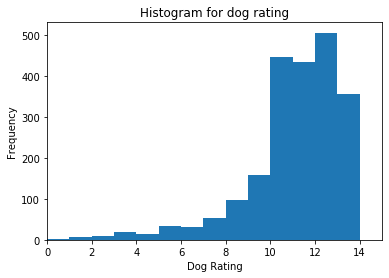

In [755]:
#histogram for the rating of the dogs
plt.hist(master.rating, bins= np.arange(0,15,1) )
plt.xlim((0,15))
plt.xlabel('Dog Rating')
plt.ylabel('Frequency')
plt.title('Histogram for dog rating');

In [758]:
# Proportion of ratings that are 10 and above
master.query('rating>=10').count()[0]/ master.shape[0]

0.8028558268079227

This shows that the majority of the ratings are between 10 and 14. It is a heavily left skewed distribution. About 80% of the dogs get a rating equal to or above 10.

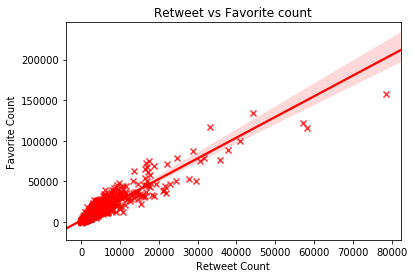

In [774]:
# Finding the correlation between retweets and favorites
sns.regplot(x= master.retweet_count, y= master.favorite_count, marker= 'x', color= 'r')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Retweet vs Favorite count');

Understandably there seems to be heavy correlation between retweet count and favorite count.The Pearson's coefficient for the correlation is about 0.93.

In [775]:
#Finding Peearson's coefficient of correlation
master[['retweet_count', 'favorite_count']].corr().iloc[0,1]

0.9269889123013437

The ratings above 15 were found to be joke ratings on tweets and will be removed from our visualization whenever we are using the rating column. Eg. Snoop Dog's picture had a rating of 420/10

In [779]:
# Taking only ratings that were reviewed seriously and are below 15
master_c = master.query('rating<15')

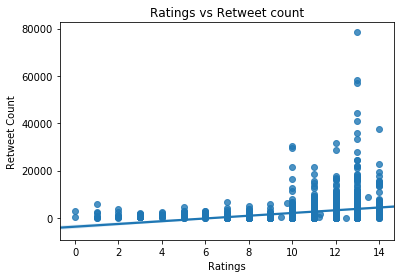

In [784]:
# Finding the correlation between ratings and retweets

sns.regplot(y= master_c.retweet_count, x= master_c.rating)
plt.xlabel('Ratings')
plt.ylabel('Retweet Count')
plt.title('Ratings vs Retweet count');

In [912]:
#Finding Peearson's coefficient of correlation
master_c[['retweet_count', 'rating']].corr()

,retweet_count,rating
retweet_count,1.000000,0.287101
rating,0.287101,1.000000


In [913]:
master_c.rating.mean()

10.630092336103417

The correlation between the rating and retweets is quite weak and has a correlation coefficient of 0.287.

In [788]:
# Most common dog names
master.name.value_counts()
#There are too many missing dog names and any analysis we do with the name column will not be useful

None       677
a           55
Charlie     11
Lucy        11
Cooper      10
          ... 
Brooks       1
Kuyu         1
Zoe          1
Lupe         1
Fynn         1
Name: name, Length: 956, dtype: int64

In [794]:
# Finding the percent of correct guesses for the neural network algorithm
master.p1_dog.mean()

0.7405920722528851

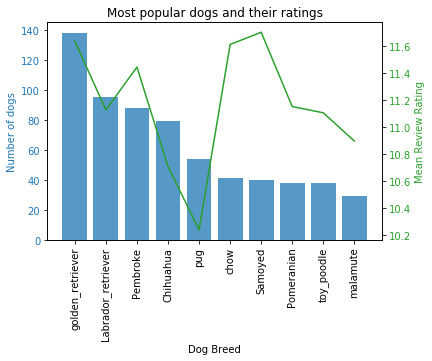

In [855]:
# Finding the 10 most common breeds of the dog which the algorith correctly predicted
temp_series= master.query('p1_dog==True')['p1'].value_counts().head(10)
temp_series

# Finding the average rating for the 10 most common dog breeds
temp_series2= master.query('p1_dog==True').groupby(by='p1').mean().loc[temp_series.index, 'rating']

# Plotting a barplot of the most common dog breeds
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Dog Breed')
ax1.set_ylabel('Number of dogs', color=color)
ax1.bar(temp_series.index,temp_series, color= color, alpha= 0.75)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x',rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Mean Review Rating', color=color)  # we already handled the x-label with ax1
ax2.plot(temp_series2.index,temp_series2, color= color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Most popular dogs and their ratings');

In [921]:
# Mean Rating for pugs
master.query('p1_dog==True & p1=="pug"')['rating'].mean()

10.24074074074074

In [864]:
# Finding which breeds have the highest rating
temp_series3= master.query('p1_dog==True').groupby(by='p1').mean()['rating'].sort_values(ascending= False).head(5)
temp_series3

p1
Saluki                12.500000
briard                12.333333
Tibetan_mastiff       12.250000
Border_terrier        12.142857
standard_schnauzer    12.000000
Name: rating, dtype: float64

p1
standard_poodle     5917.000000
English_springer    5323.777778
Afghan_hound        5261.666667
Eskimo_dog          4858.666667
Saluki              4545.500000
Name: retweet_count, dtype: float64


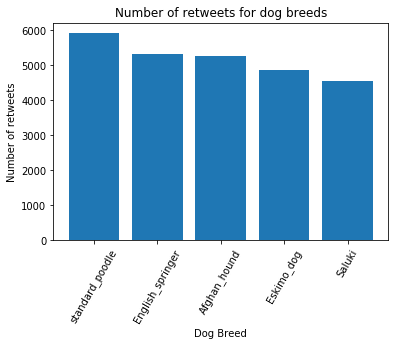

In [916]:
# Finding which breeds get retweeted the most
temp_series4= master.query('p1_dog==True').groupby(by='p1').mean()['retweet_count'].sort_values(ascending= False).head(5)
plt.bar(x= temp_series4.index, height= temp_series4)
plt.xticks(rotation=60)
plt.xlabel('Dog Breed')
plt.ylabel('Number of retweets')
plt.title('Number of retweets for dog breeds');
print(temp_series4)

In [919]:
master['retweet_count'].mean()

2470.3895563770793

In [866]:
master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7755.0,36465.0,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [888]:
# Adding Year and month as a seperate column for easier grouping for analysis. This will however make our data a bit untidy
master_c2= master.copy()
master_c2['year']= master.timestamp.dt.year
master_c2['month']= master.timestamp.dt.month
master_c2.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,category,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,7755.0,36465.0,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,2017,8


In [901]:
# Grouping the data based on month and the year for better visualization
master_c2_df= master_c2.groupby(by=['year', 'month']).count()['tweet_id'].reset_index()
master_c2_df['y_m']= master_c2_df['year'].map(str)+'-'+master_c2_df['month'].map(str)
master_c2_df.head()

,year,month,tweet_id,y_m
0,2015,11,300,2015-11
1,2015,12,388,2015-12
2,2016,1,193,2016-1
3,2016,2,125,2016-2
4,2016,3,136,2016-3


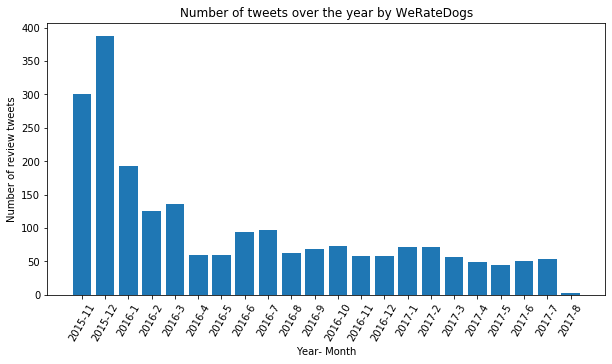

In [911]:
plt.figure(figsize=[10,5])
plt.bar(x=master_c2_df['y_m'], height= master_c2_df['tweet_id'])
plt.xticks(rotation=60)
plt.title('Number of tweets over the year by WeRateDogs')
plt.xlabel('Year- Month')
plt.ylabel('Number of review tweets');